In [1]:
# Reference
# https://yurimkoo.github.io/python/2019/09/14/connect-db-with-python.html

import pandas as pd
import os
from dotenv import load_dotenv
from scipy import stats

# Load api key & RDS info (endpoint="rds 엔드포인트", dbname="db 이름", username="마스터 사용자 이름", password="rds 비밀번호")
load_dotenv()
api_key = os.environ.get("API_KEY")
endpoint = os.environ.get("AWS_endpoint")
dbname = os.environ.get('AWS_dbname')
username = os.environ.get("AWS_username")
password = os.environ.get("AWS_password")

In [2]:
idx = 2
tournament_info = pd.read_csv("./Data/tournament_info.csv")
tournament_info.drop(['Unnamed: 0'], axis = 1, inplace = True)

tournament_name = tournament_info["id"][idx]
tournament_createdAt = tournament_info["createdAt"][idx]

print(tournament_info.loc[idx])

id                       as-apls1
createdAt    2022-04-17T10:16:50Z
Name: 2, dtype: object


In [3]:
data = pd.read_csv(f"./Data/{tournament_name}_match_info.csv")
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data

,player_id,team_rank,dbnos,assists,boosts,damage_dealt,headshot_kills,heals,kill_streaks,kills,longest_kill,revives,team_kills,time_survived
0,MCG_Peng,13,0,2,3,50.798405,0,1,0,0,0.000000,0,0,986
1,MCG_995iTank,13,1,1,1,208.332050,0,4,1,1,12.921406,0,0,1033
2,MCG_LingDuuuuuu,13,1,1,2,197.494140,0,1,1,2,288.352750,0,0,1033
3,MCG_9,13,2,0,1,84.786026,0,5,1,1,52.876310,2,0,1024
4,GBL_Lambu,7,0,0,1,0.000000,0,1,0,0,0.000000,0,0,1249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,Tianba_Cui71,13,3,1,4,231.089940,0,1,2,3,56.791770,2,0,929
1724,DK_Makne,9,0,2,4,75.427370,0,0,0,0,0.000000,0,0,296
1725,DK_Loki,9,3,0,2,337.555760,0,1,1,3,210.029040,0,0,1205
1726,DK_Under,9,0,0,3,58.560660,0,1,0,0,0.000000,0,0,1205


In [4]:
# 결측치 확인
data.isnull().sum()

player_id         0
team_rank         0
dbnos             0
assists           0
boosts            0
damage_dealt      0
headshot_kills    0
heals             0
kill_streaks      0
kills             0
longest_kill      0
revives           0
team_kills        0
time_survived     0
dtype: int64

In [5]:
data = data.groupby('player_id').sum()
data = data.reset_index()
data

,player_id,team_rank,dbnos,assists,boosts,damage_dealt,headshot_kills,heals,kill_streaks,kills,longest_kill,revives,team_kills,time_survived
0,17_Lilghost,148,29,22,87,6686.405530,8,59,21,36,1605.837973,8,0,27292
1,17_SuJiu,148,29,14,100,4841.922364,9,63,14,27,1330.948962,7,0,26419
2,17_Xbei,148,42,11,105,7401.643040,8,46,27,43,1110.002603,10,0,28919
3,17_shou,148,36,19,69,6727.384434,8,50,23,43,1340.972028,13,0,25612
4,4AM_Lzqq,93,9,7,24,2201.283398,3,15,4,6,96.901731,1,0,9385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,emT_Stella,216,16,11,43,3628.368679,4,30,11,17,898.338130,4,0,22700
99,iFTY_L1nnn,164,19,15,60,3455.967466,2,31,12,21,1585.500986,4,0,22609
100,iFTY_LongSkr,164,46,15,49,7611.109675,15,57,19,40,1286.801655,1,1,25193
101,iFTY_VoliBEAR,164,21,7,41,3879.753665,5,50,16,22,1016.551229,2,0,23964


In [6]:
# Add MVP column
winner_team = "17"
data_MVP = 1*(data["player_id"].str.find(f"{winner_team}_") >= 0)
data["win"] = data_MVP
data

# MVP_players = (["17_Xbei"])
# data.loc[data['player_id'].where(MVP_players)]

,player_id,team_rank,dbnos,assists,boosts,damage_dealt,headshot_kills,heals,kill_streaks,kills,longest_kill,revives,team_kills,time_survived,win
0,17_Lilghost,148,29,22,87,6686.405530,8,59,21,36,1605.837973,8,0,27292,1
1,17_SuJiu,148,29,14,100,4841.922364,9,63,14,27,1330.948962,7,0,26419,1
2,17_Xbei,148,42,11,105,7401.643040,8,46,27,43,1110.002603,10,0,28919,1
3,17_shou,148,36,19,69,6727.384434,8,50,23,43,1340.972028,13,0,25612,1
4,4AM_Lzqq,93,9,7,24,2201.283398,3,15,4,6,96.901731,1,0,9385,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,emT_Stella,216,16,11,43,3628.368679,4,30,11,17,898.338130,4,0,22700,0
99,iFTY_L1nnn,164,19,15,60,3455.967466,2,31,12,21,1585.500986,4,0,22609,0
100,iFTY_LongSkr,164,46,15,49,7611.109675,15,57,19,40,1286.801655,1,1,25193,0
101,iFTY_VoliBEAR,164,21,7,41,3879.753665,5,50,16,22,1016.551229,2,0,23964,0


In [7]:
# Z-Score using scipy
z_label = (["team_rank", "dbnos", "assists", "boosts", "damage_dealt", "headshot_kills", "heals", "kill_streaks", "kills", "longest_kill", "revives", "team_kills", "time_survived"])
for i in z_label:
    data[i] = stats.zscore(data[i])

data

,player_id,team_rank,dbnos,assists,boosts,damage_dealt,headshot_kills,heals,kill_streaks,kills,longest_kill,revives,team_kills,time_survived,win
0,17_Lilghost,0.102318,1.360422,2.560349,1.509815,2.042617,1.366326,1.101430,1.810214,2.000101,1.739578,1.353417,-0.307711,1.173982,1
1,17_SuJiu,0.102318,1.360422,1.082949,1.997310,1.003389,1.697460,1.292097,0.646966,1.122631,1.173433,1.020715,-0.307711,1.065511,1
2,17_Xbei,0.102318,2.699837,0.528924,2.184808,2.445599,1.366326,0.481760,2.807284,2.682577,0.718386,2.018820,-0.307711,1.376140,1
3,17_shou,0.102318,2.081645,2.006324,0.834822,2.065705,1.366326,0.672427,2.142571,2.682577,1.194076,3.016924,-0.307711,0.965240,1
4,4AM_Lzqq,-0.940189,-0.700217,-0.209776,-0.852661,-0.484414,-0.289340,-0.995914,-1.014817,-0.924798,-1.368134,-0.975494,-0.307711,-1.050991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,emT_Stella,1.391236,0.021007,0.528924,-0.140168,0.319642,0.041794,-0.280911,0.148431,0.147665,0.282455,0.022611,-0.307711,0.603419,0
99,iFTY_L1nnn,0.405593,0.330102,1.267624,0.497325,0.222507,-0.620473,-0.233244,0.314609,0.537651,1.697693,0.022611,-0.307711,0.592112,0
100,iFTY_LongSkr,0.405593,3.111965,1.267624,0.084829,2.563618,3.684259,1.006096,1.477858,2.390087,1.082510,-0.975494,1.956162,0.913178,0
101,iFTY_VoliBEAR,0.405593,0.536166,-0.209776,-0.215168,0.461279,0.372927,0.672427,0.979323,0.635148,0.525919,-0.642792,-0.307711,0.760473,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

X = data[z_label]
y = data["win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

print("특성 중요도 : \n{}".format(forest.feature_importances_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.903
특성 중요도 : 
[0.0441486  0.04550224 0.07421555 0.26428741 0.11064409 0.02243415
 0.03935375 0.04149706 0.06335467 0.04020047 0.03087904 0.00385233
 0.21963064]


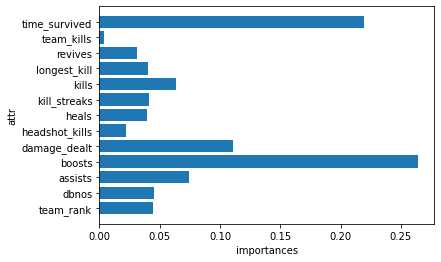

In [9]:
# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model):
    n_features = len(z_label)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), z_label)
    plt.xlabel("importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances_cancer(forest)